In [1]:
%reload_ext autoreload
%autoreload 2
import task3.optimization as opt
import task3.oracles as oracles

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class OracleCounter(oracles.LassoProxOracle):
    def __init__(self, *args, **kwargs):
        self.itertions = []
        return super(OracleCounter, self).__init__(*args, **kwargs)
        
    def prox(self, *args):
        self.itertions[-1] += 1
        return super(OracleCounter, self).prox(*args)
    
    def duality_gap(self, *args):
        self.itertions.append(0)
        return super(OracleCounter, self).duality_gap(*args)
    
def create_lasso_count_prox_oracle(A, b, regcoef):
    matvec_Ax = lambda x: A.dot(x)
    matvec_ATx = lambda x: A.T.dot(x)
    return OracleCounter(oracles.LeastSquaresOracle(matvec_Ax, matvec_ATx, b),
                         oracles.L1RegOracle(regcoef))

In [4]:
x = (20, 50, 200)
y = (500, 1000, 2000)
dim = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])

In [5]:
oracle_list = []
np.random.seed(95)
for d, n in dim:
    A = np.random.randn(n, d)
    b = np.random.randn(n)
    x_0 = np.zeros(d)
    oracle = create_lasso_count_prox_oracle(A, b, 1)
    opt.proximal_gradient_method(oracle, x_0)
    oracle_list.append(oracle)

In [6]:
summ = 0
for oracle in oracle_list:
    summ += np.mean(oracle.itertions[1:-1])
print(summ/9)

1.9625414358094093


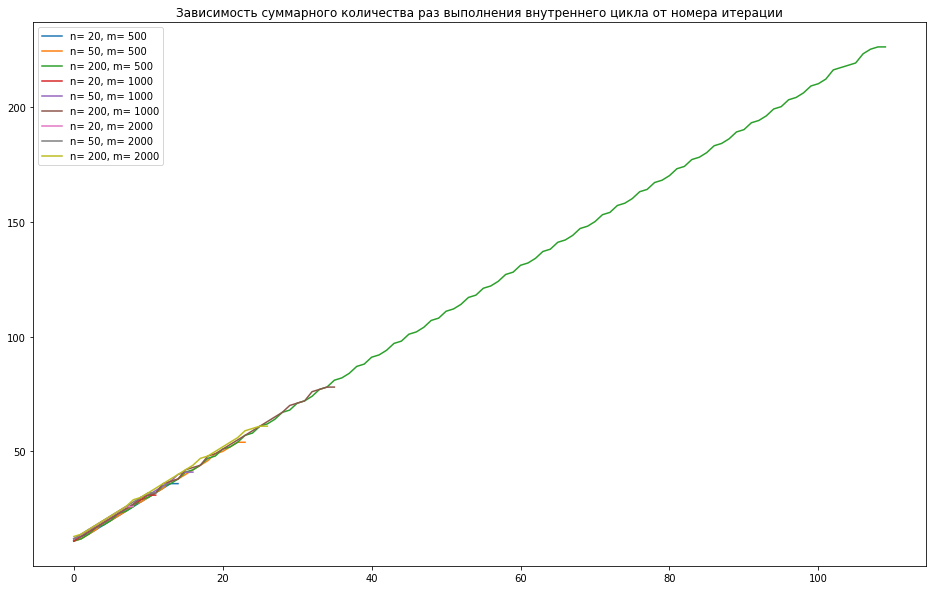

In [7]:
plt.figure(figsize=(16, 10))
plt.title('Зависимость суммарного количества раз выполнения внутреннего цикла от номера итерации')
for i, oracle in  enumerate(oracle_list):
    plt.plot(np.cumsum(oracle.itertions), label='n= {}, m= {}'.format(*dim[i]))
plt.legend()
plt.savefig('exp1-1', bbox_inches='tight')

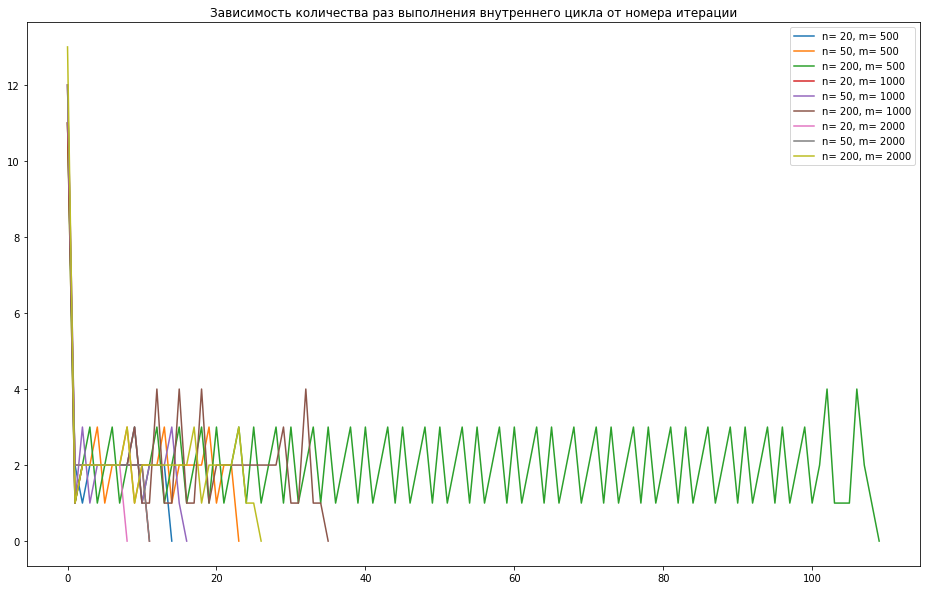

In [8]:
plt.figure(figsize=(16, 10))
plt.title('Зависимость количества раз выполнения внутреннего цикла от номера итерации')
for i, oracle in  enumerate(oracle_list):
    plt.plot(oracle.itertions, label='n= {}, m= {}'.format(*dim[i]))
plt.legend()
plt.savefig('exp1-2', bbox_inches='tight')

In [9]:
oracle_fast_list = []
np.random.seed(95)
for d in (20, 50, 200):
    for n in (500, 1000, 2000):
        A = np.random.randn(n, d)
        b = np.random.randn(n)
        x_0 = np.zeros(d)
        oracle = create_lasso_count_prox_oracle(A, b, 1)
        opt.proximal_fast_gradient_method(oracle, x_0)
        oracle_fast_list.append(oracle)

In [10]:
summ = 0
for oracle in oracle_fast_list:
    summ += np.mean(oracle.itertions[1:-1])
print(summ/9)

1.9924084943215128


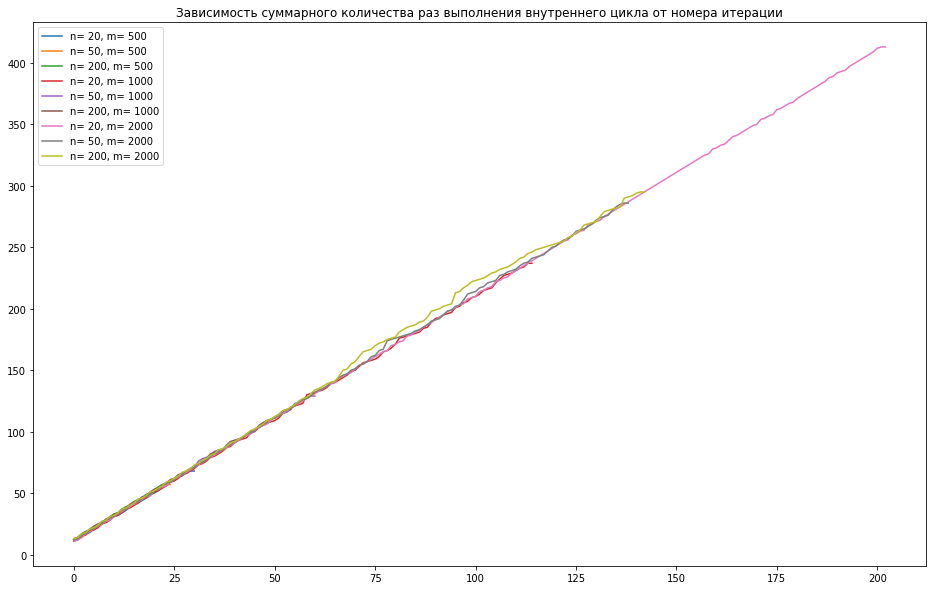

In [11]:
plt.figure(figsize=(16, 10))
plt.title('Зависимость суммарного количества раз выполнения внутреннего цикла от номера итерации')
for i, oracle in  enumerate(oracle_fast_list):
    plt.plot(np.cumsum(oracle.itertions), label='n= {}, m= {}'.format(*dim[i]))
plt.legend()
plt.savefig('exp1-3', bbox_inches='tight')

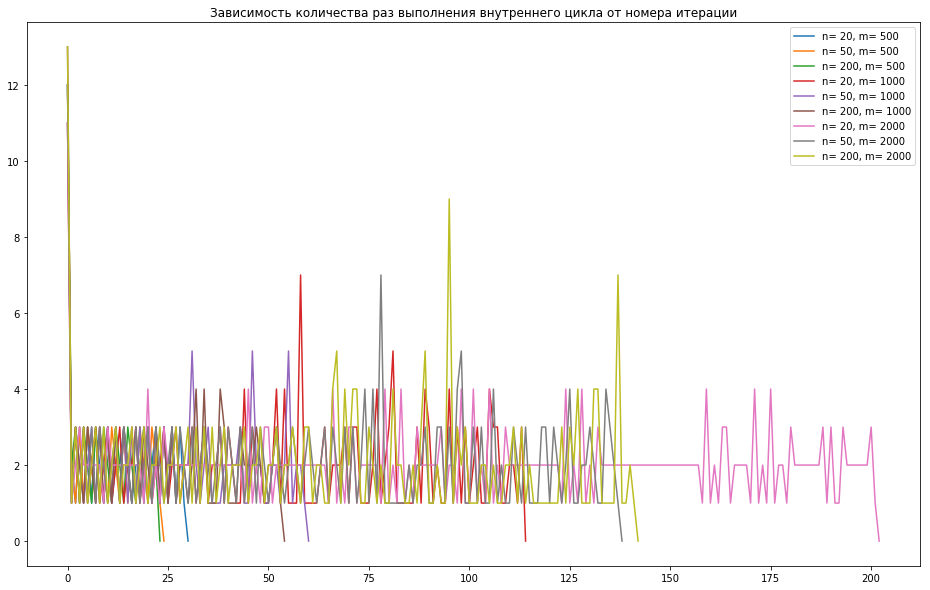

In [12]:
plt.figure(figsize=(16, 10))
plt.title('Зависимость количества раз выполнения внутреннего цикла от номера итерации')
for i, oracle in enumerate(oracle_fast_list):
    plt.plot(oracle.itertions, label='n= {}, m= {}'.format(*dim[i]))
plt.legend()
plt.savefig('exp1-4', bbox_inches='tight')

In [13]:
np.random.seed(112312)
prox_res = []
fast_res = []
barr_res = []
names = []
for d in [20, 200]:
    for n in [1000, 10000]:
        for l in [0.01, 1]:
            A = np.random.randn(n, d)
            b = np.random.randn(n)
            x_0 = np.zeros(d)
            names.append((d, n, l))
            oracle = oracles.create_lasso_prox_oracle(A, b, l)
            prox_res.append(opt.proximal_gradient_method(oracle, x_0, trace=True)[2])
            fast_res.append(opt.proximal_fast_gradient_method(oracle, x_0, trace=True)[2])
            barr_res.append(opt.barrier_method_lasso(A, b, l, x_0, np.ones([d]), trace=True)[2])

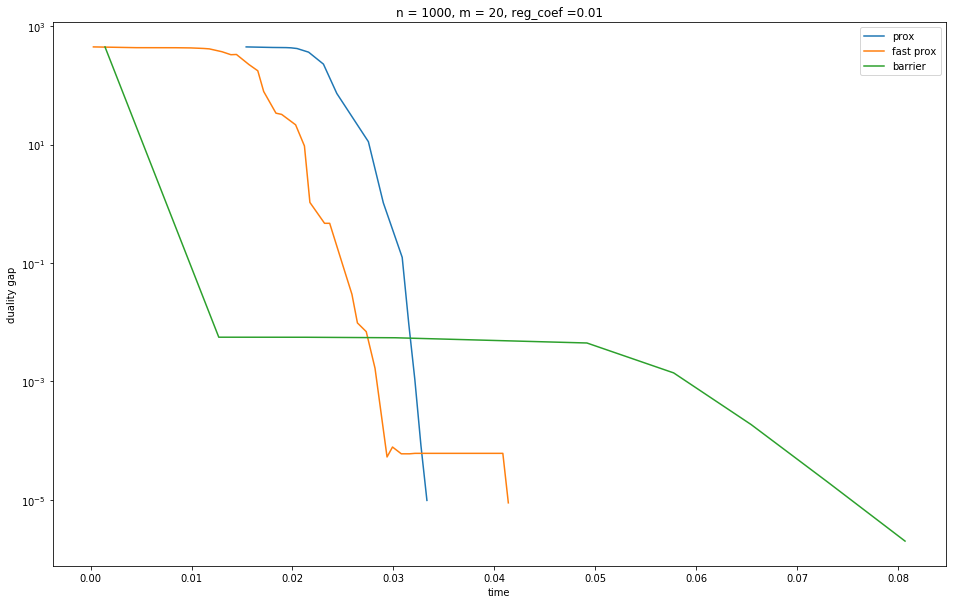

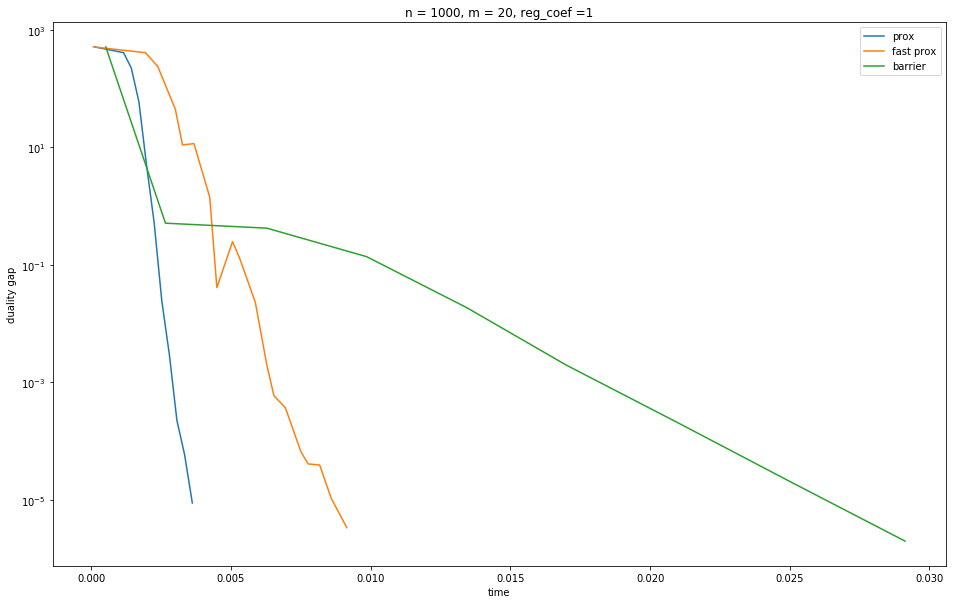

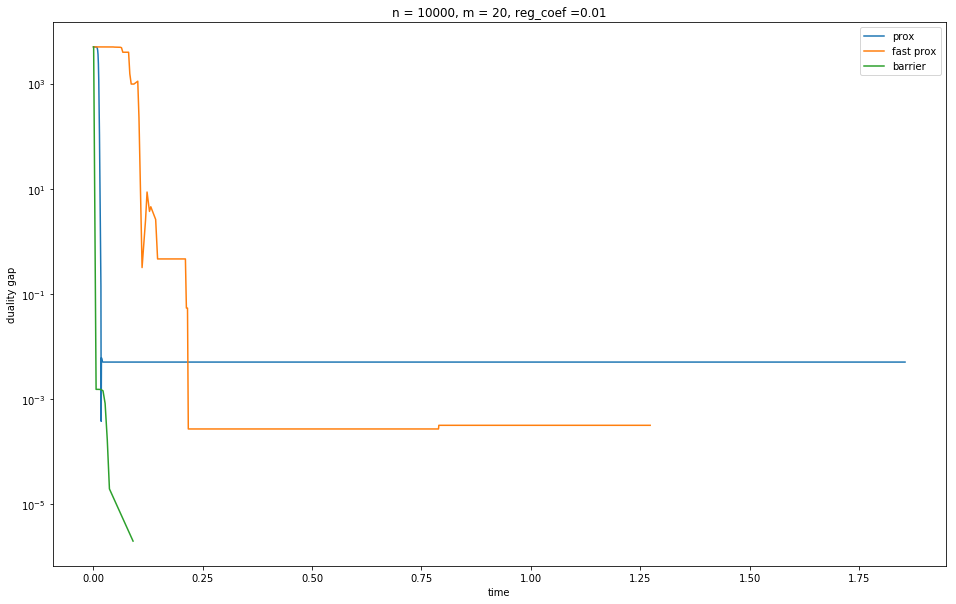

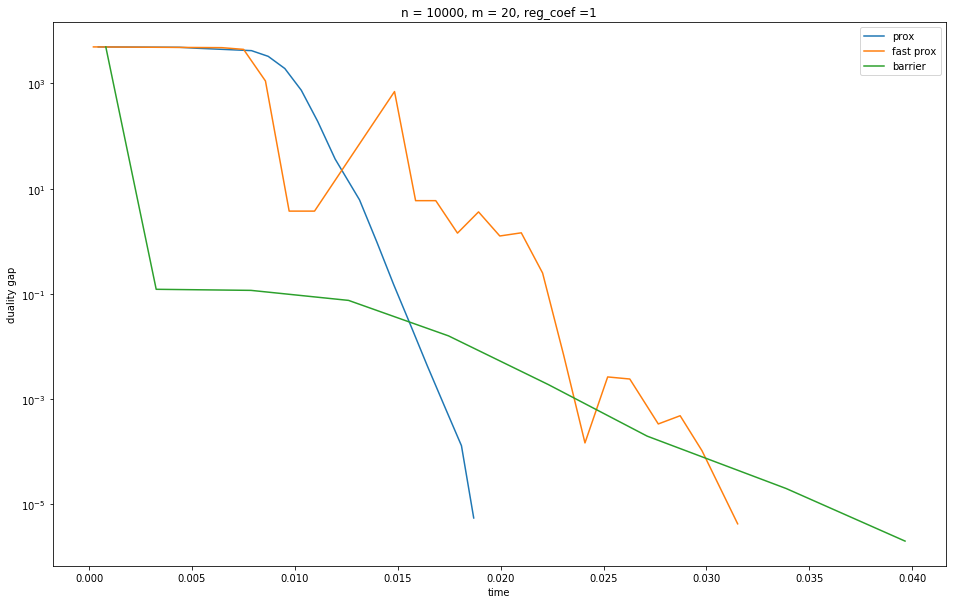

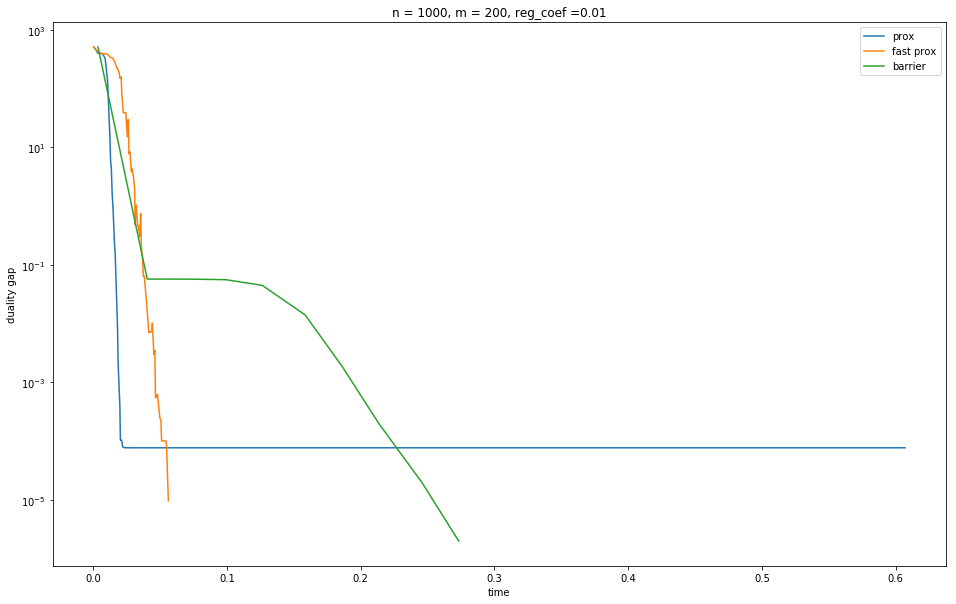

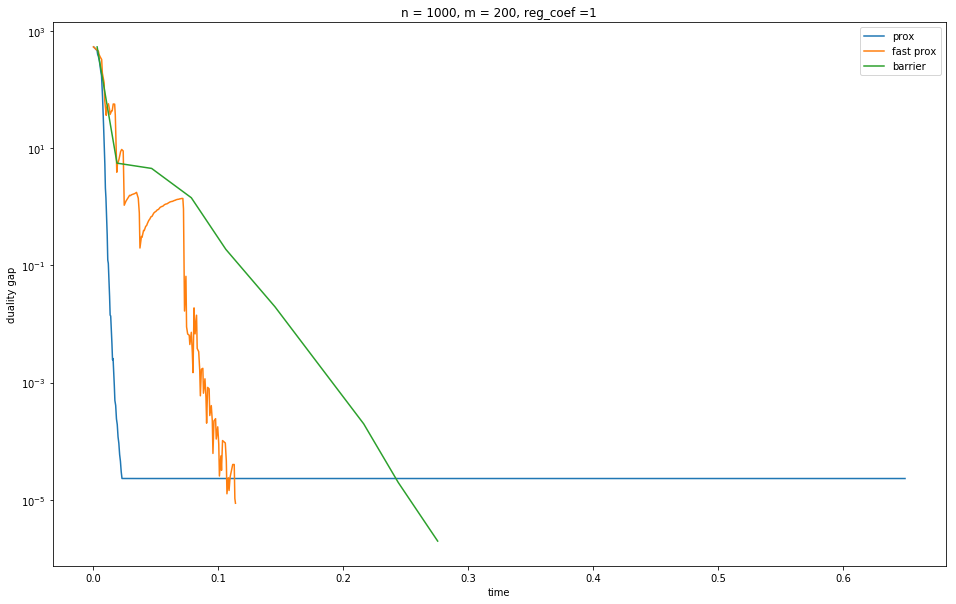

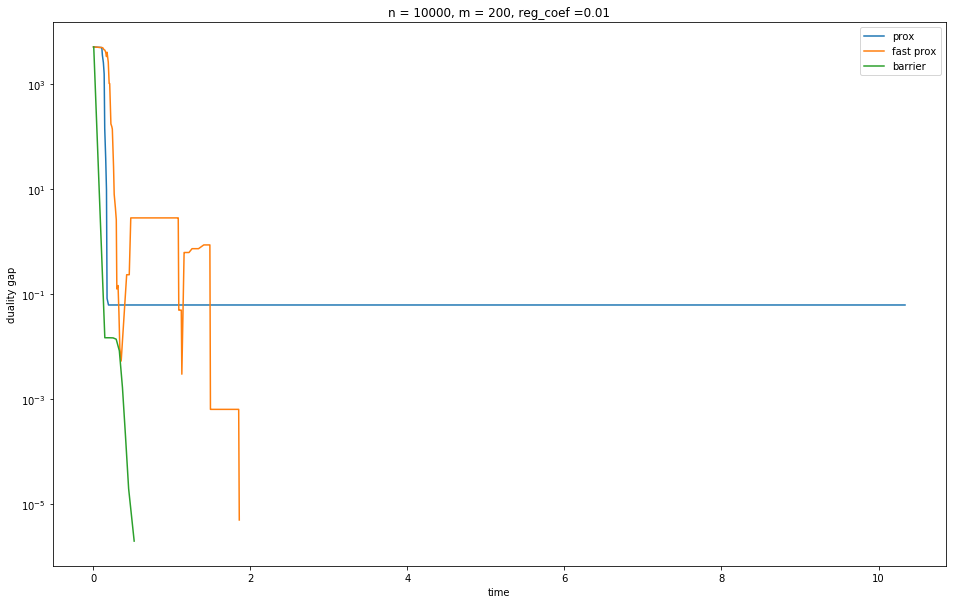

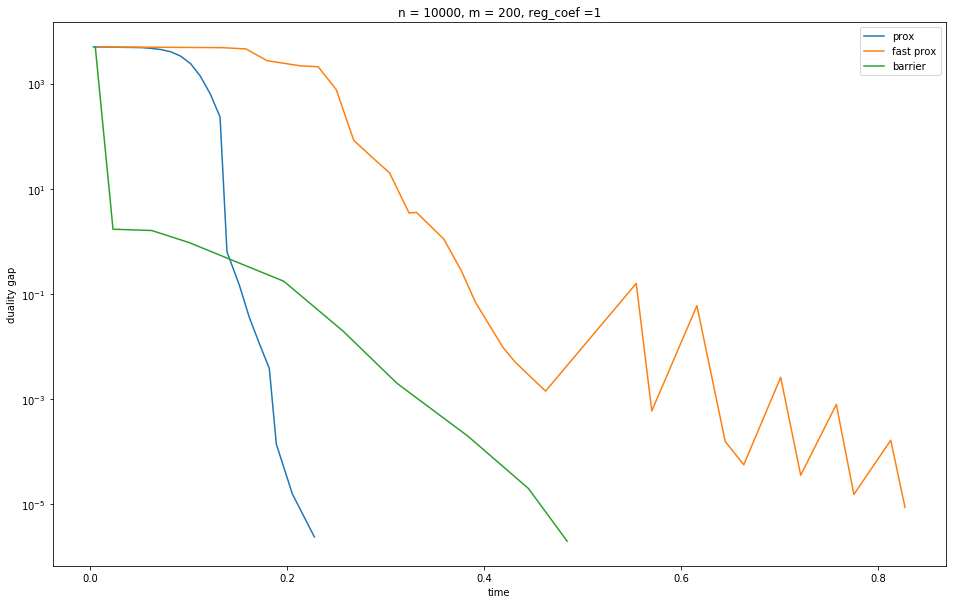

In [14]:
for i, name in enumerate(names):
    plt.figure(figsize=(16, 10))
    for res, label in zip((prox_res, fast_res, barr_res), ('prox', 'fast prox', 'barrier')):
        plt.plot(res[i]['time'], res[i]['duality_gap'], label=label)
    plt.yscale('log')
    plt.legend()
    plt.title('n = {1}, m = {0}, reg_coef ={2}'.format(*name))
    plt.xlabel('time')
    plt.ylabel('duality gap')
    plt.savefig('images/exp2-{:d}'.format(i+1), bbox_inches='tight')

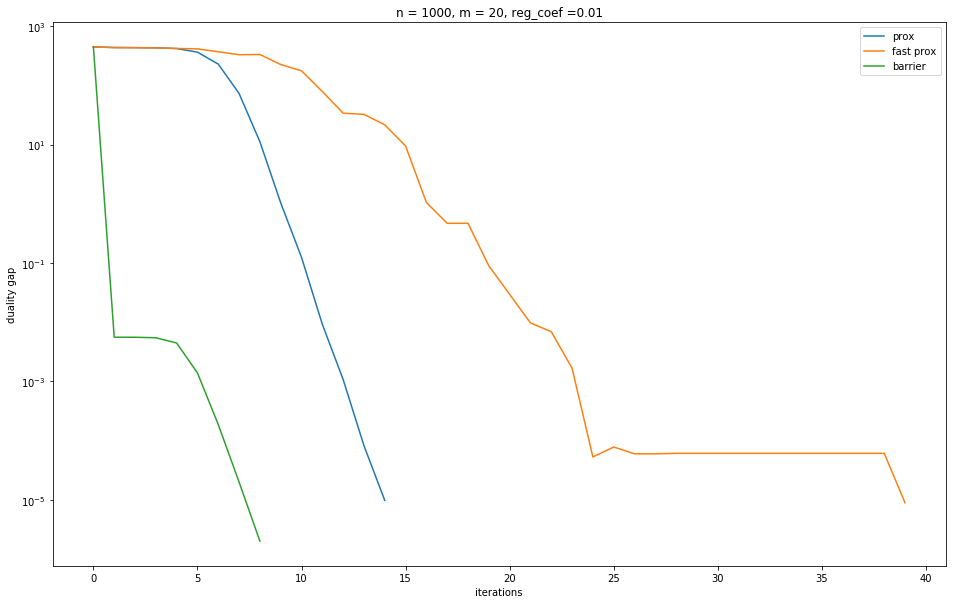

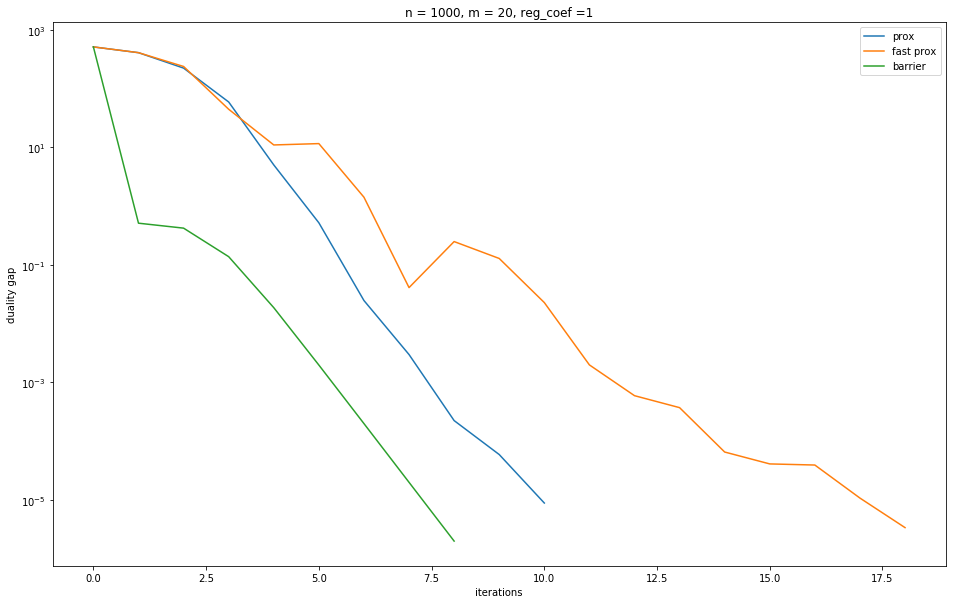

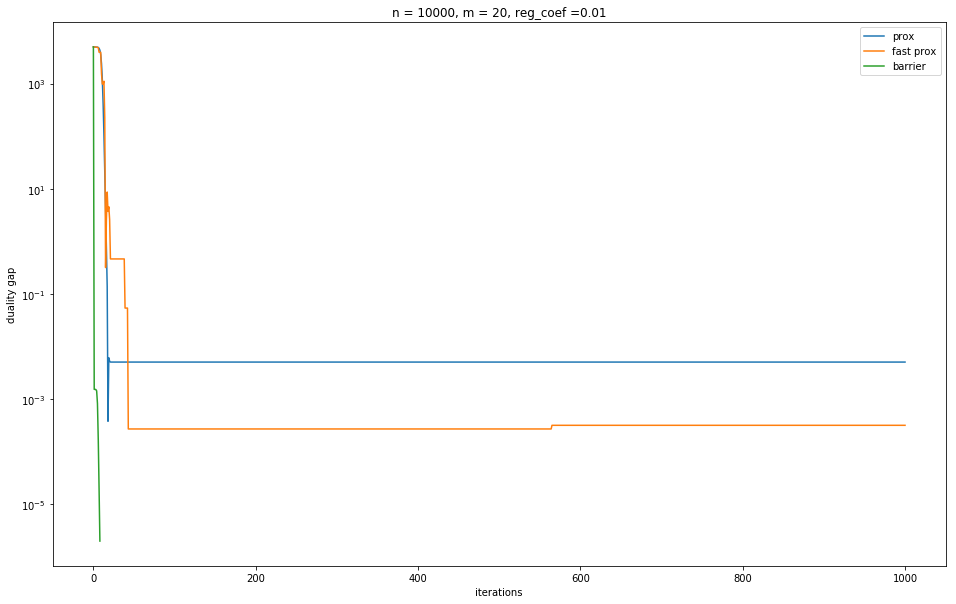

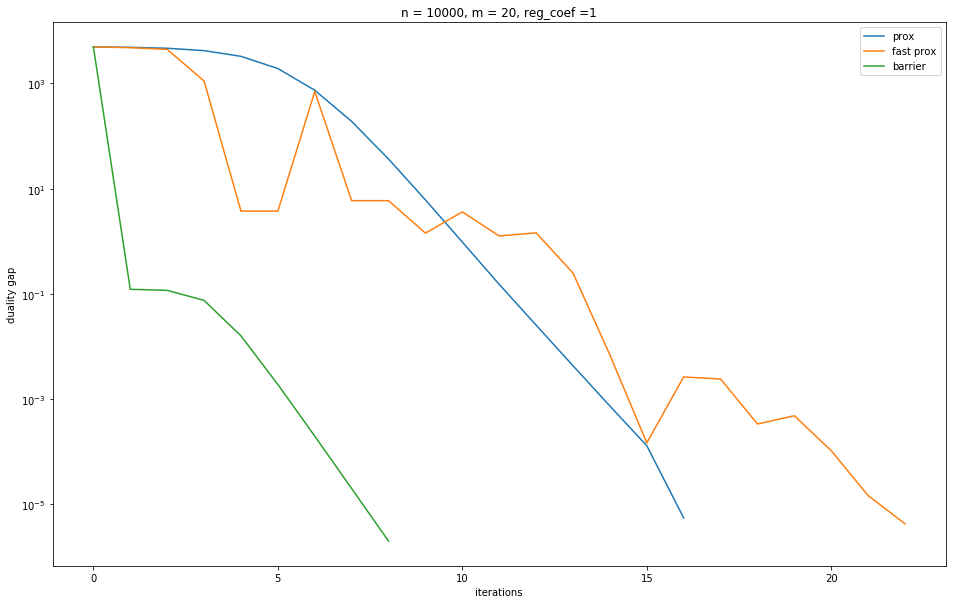

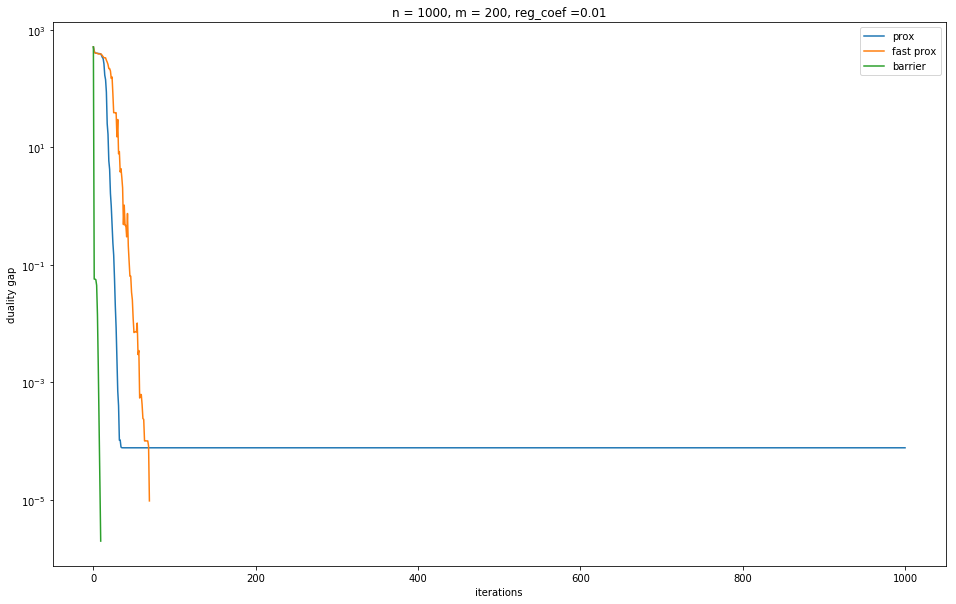

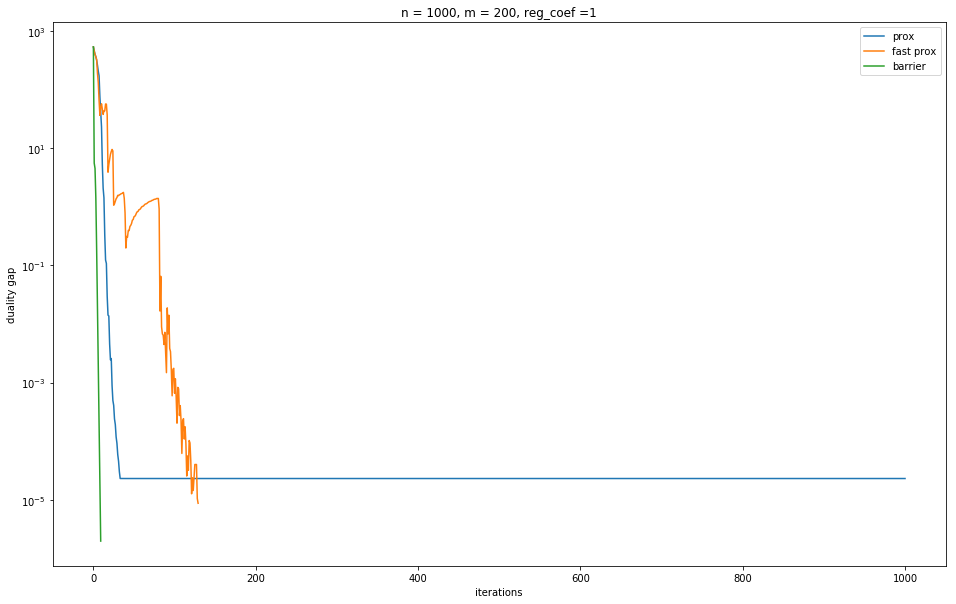

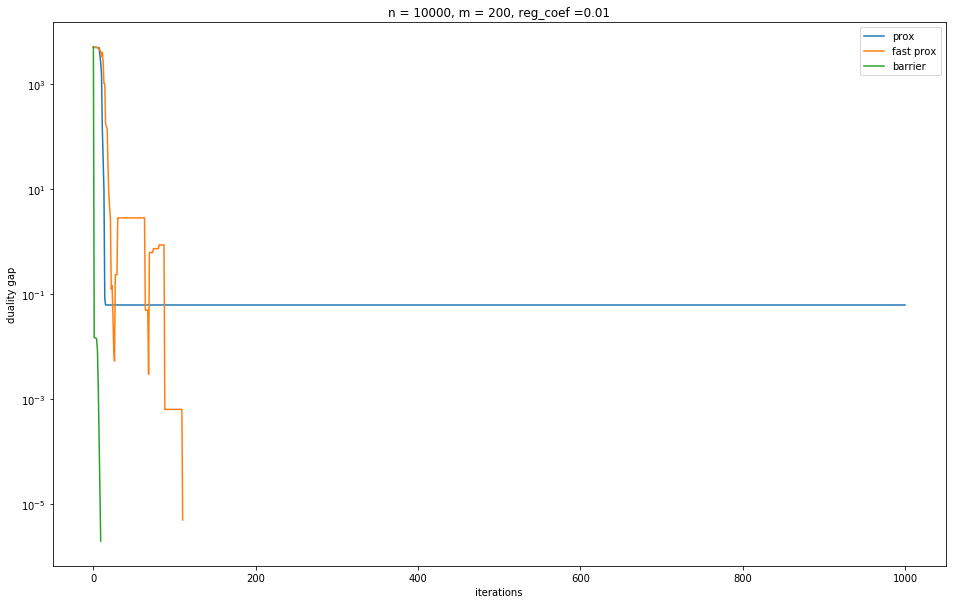

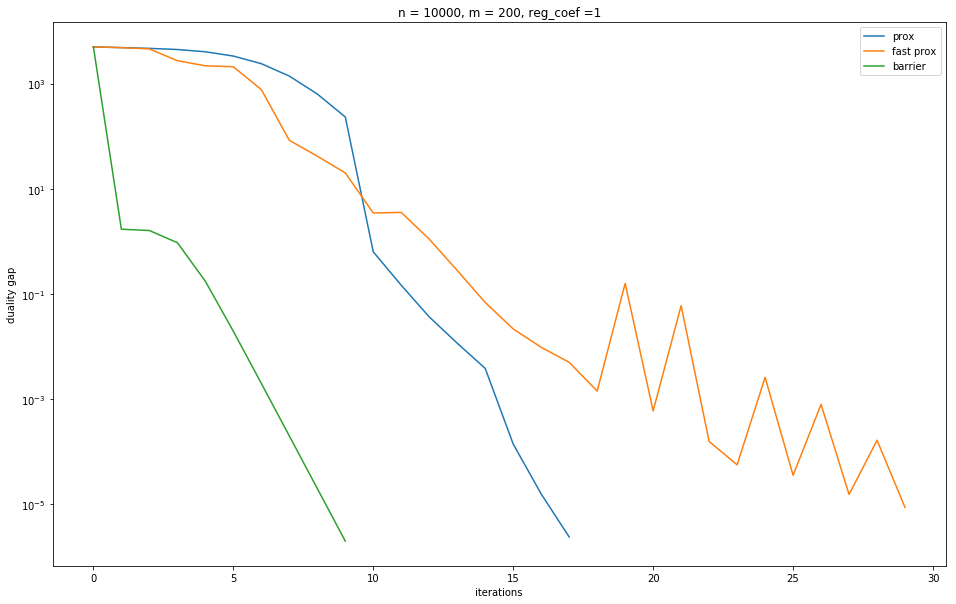

In [15]:
for i, name in enumerate(names):
    plt.figure(figsize=(16, 10))
    for res, label in zip((prox_res, fast_res, barr_res), ('prox', 'fast prox', 'barrier')):
        plt.plot(res[i]['duality_gap'], label=label)
    plt.yscale('log')
    plt.legend()
    plt.title('n = {1}, m = {0}, reg_coef ={2}'.format(*name))
    plt.xlabel('iterations')
    plt.ylabel('duality gap')
    plt.savefig('images/exp3-{:d}'.format(i+1), bbox_inches='tight')